In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge,Lasso
from sklearn.datasets import load_boston

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [3]:
print(boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB
None


In [4]:
boston_df['Price']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
X=boston_df.drop('Price',axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
Y=boston_df['Price']
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3,random_state=3)
print(len(x_train),len(x_test))

354 152


In [26]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
reg.coef_

array([-1.28899229e-01,  4.62536564e-02, -5.41974027e-02,  3.83208843e+00,
       -1.24514995e+01,  3.72790367e+00,  7.37824474e-03, -1.19551784e+00,
        2.80152377e-01, -7.75364999e-03, -8.27122705e-01,  1.25331573e-02,
       -5.56644117e-01])

In [28]:
reg.intercept_

28.744950121672087

In [29]:
y_pred=reg.predict(x_test)

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("RMSE",rmse)
print("R2",r2)

RMSE 4.736236488050141
R2 0.7147895265576849


Text(0.5, 1.0, 'Residual plot')

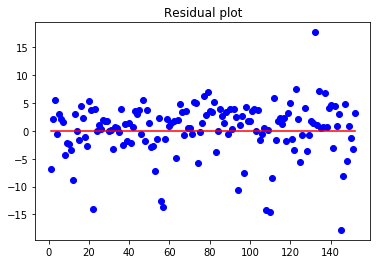

In [31]:
#residual plot
x=[i for i in range(1,len(y_pred)+1)]
x_plot=plt.scatter(x,(y_pred-y_test),c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title('Residual plot')

## Regularization

In [32]:
predictors=x_train.columns
predictors

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [33]:
coef=pd.Series(reg.coef_,predictors).sort_values()
coef

NOX       -12.451500
DIS        -1.195518
PTRATIO    -0.827123
LSTAT      -0.556644
CRIM       -0.128899
INDUS      -0.054197
TAX        -0.007754
AGE         0.007378
B           0.012533
ZN          0.046254
RAD         0.280152
RM          3.727904
CHAS        3.832088
dtype: float64

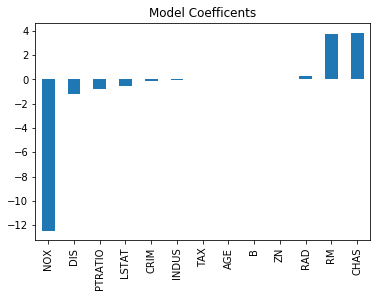

In [34]:
coef.plot(kind='bar',title='Model Coefficents')

## Ridge Regression
# >L2 regularization

In [36]:
''' alpha is hyperparameter of Ridge, which which means they are not automatically learned by the model
    instead they have to be set manually'''
# aplha_range=[.01,.05,.5,5]
ridgeReg=Ridge(alpha=.05,normalize=True)
ridgeReg.fit(x_train,y_train)
pred=ridgeReg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)
print('RMSE',rmse,'R2',r2)

RMSE 4.8099859419715285 R2 0.7058381656181565


In [42]:
df=pd.DataFrame(columns=['Linear Reg','Ridge Reg'])
for i in range(len(ridgeReg.coef_)):
    df=df.append({'Linear Reg':reg.coef_[i],'Ridge Reg':ridgeReg.coef_[i]},ignore_index=True)
df    

,Linear Reg,Ridge Reg
0,-0.128899,-0.115389
1,0.046254,0.037433
2,-0.054197,-0.083776
3,3.832088,3.979907
4,-12.451500,-9.107753
5,3.727904,3.885508
6,0.007378,0.002550
7,-1.195518,-0.999075
8,0.280152,0.185377
9,-0.007754,-0.003916


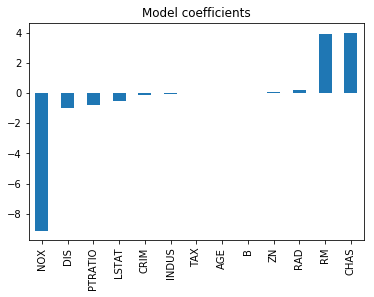

In [43]:
predictors=x_train.columns
coef=pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Model coefficients')

## Lasso Regression
# > L1 regularization

In [46]:
#alpha_range=[.01,.05,.5,5]
lassoReg=Lasso(alpha=.01,normalize=True)
lassoReg.fit(x_train,y_train)
pred=lassoReg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("RMSE",rmse)
print('R2',r2)

RMSE 4.736236488050141
R2 0.7147895265576849


In [50]:
df=pd.DataFrame(columns=['Linear Reg','Ridge Reg','Lasso Reg'])
for i in range(len(ridgeReg.coef_)):
    df=df.append({'Linear Reg':reg.coef_[i],'Ridge Reg':ridgeReg.coef_[i],'Lasso Reg':lassoReg.coef_[i]},ignore_index=True)
df    

,Linear Reg,Ridge Reg,Lasso Reg
0,-0.128899,-0.115389,-0.073046
1,0.046254,0.037433,0.021283
2,-0.054197,-0.083776,-0.059355
3,3.832088,3.979907,3.582445
4,-12.451500,-9.107753,-2.950966
5,3.727904,3.885508,4.096290
6,0.007378,0.002550,0.000000
7,-1.195518,-0.999075,-0.653914
8,0.280152,0.185377,0.050072
9,-0.007754,-0.003916,-0.000000


RMSE 4.736236488050141 R2 0.7147895265576849


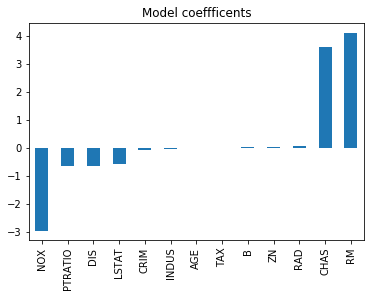

In [53]:
print('RMSE',rmse,'R2',r2)
coef=pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Model coeffficents')